----------

## <span style="color:green">Финальный комментарий от наставника<span>

Йей, поздравляю со сдачей третьего проекта ^_^

Замечание: округлить вверх это `np.ceil`, вниз -- `np.floo`

---------

----------

## <span style="color:green">Комментарий от наставника<span>

Привет! Комментарии будут в таких же ячейках :)

---------

# <a name="contents">Задачи исследования</a>
## [1. Осмотр и обработка данных](#stage_1)
    - посмотрим наборы данных
    - сделаем предварительные выводы
    - поищем аномалии
    - найти и обработать пропуски
    - заменить некорректные типы данных
    - удалить дубликаты
    - привести данные к нужным типам


## [2. Подготовка данных](#stage_2)
**Посчитайте для каждого пользователя:**
    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, 
 остаток умножьте на значение из тарифного плана)


## [3. Анализ данных](#stage_3)
    - Опишите поведение клиентов оператора, исходя из выборки
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
    в месяц? 
    - Посчитайте среднее количество, дисперсию и стандартное отклонение
    - Постройте гистограммы. Опишите распределения


## [4. Проверка гипотез](#stage_4)
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Пороговое значение alpha задайте самостоятельно.

**Поясните:**
    - как вы формулировали нулевую и альтернативную гипотезы
    - какой критерий использовали для проверки гипотез и почему


## [5. Результаты исследования](#stage_5)
    - Общие выводы
    - Рекомендации

<a name="stage_1"></a>
# Этап 1. Опишем наборы данных, получим их, импортируем библиотеки


[Наверх к оглавлению](#contents)

## Описание тарифов

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

------

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

### Описание данных

**Путь к файлам:**
- /datasets/calls.csv
- /datasets/internet.csv
- /datasets/messages.csv
- /datasets/tariffs.csv
- /datasets/users.csv

#### Описание таблиц

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана
-----

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
-----

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение
-----

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя
-----

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Подгрузим датасеты
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

### Посмотрим на таблицу с пользователями

In [5]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [6]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


38 отвалившихся юзеров, даты не в порядке.
Приведем даты к датам.

In [8]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.3+ KB


Теперь порядок, идем к следующей таблице.

-------

### Посмотрим на таблицу с звонками

In [10]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [11]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [14]:
calls['id'] = calls['id'].astype('int')

Так как у нас оператор ~жадный~ любит работать с целыми числами, округлим значения.

In [15]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [16]:
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


Относительно порядок, есть нулевые звонки. 
Пока предположим, что это звонки, длительностью в одну минуту, так как у оператора в коде их программы не ceil, a floor.
Не зря ж задании об этом написано.

In [17]:
calls['duration'] = calls['duration'].replace(0, 1)

In [18]:
calls.describe()

,id,duration,user_id
count,"202,607.00","202,607.00","202,607.00"
mean,"1,212,254.17",7.35,"1,253.94"
std,"1,725,756.38",5.73,144.72
min,"10,000.00",1.00,"1,000.00"
25%,"1,012,286.50",2.00,"1,126.00"
50%,"1,179,376.00",6.00,"1,260.00"
75%,"1,358,125.50",11.00,"1,379.00"
max,"14,581,154.00",38.00,"1,499.00"


In [19]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


Некст.

-----

### Посмотрим на таблицу с сообщениями

In [20]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [22]:
messages['id'] = messages['id'].astype('int')

In [23]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


Ок, устроит

----

### Посмотрим на таблицу с интернетом

In [25]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [26]:
internet.describe()

,mb_used,user_id
count,"149,396.00","149,396.00"
mean,370.19,"1,252.10"
std,278.30,144.05
min,0.00,"1,000.00"
25%,138.19,"1,130.00"
50%,348.01,"1,251.00"
75%,559.55,"1,380.00"
max,"1,724.83","1,499.00"


In [27]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [28]:
internet['id'] = internet['id'].astype('int')

In [29]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [30]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null int64
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.6 MB


Ну, ок.

-----

### Посмотрим на таблицу с тарифами

In [31]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [32]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [33]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


Подозрительно, кажется, что все в порядке.

-----

----------

## <span style="color:green">Комментарий от наставника<span>

Хороший блок. Единственное, я бы разделила блоки с открытием и изучением файлов методами `info, describe` и саму предобработку. Так работа будет структурированнее. Например, если бы блок предобработки затянулся, то все бы *смешалось в доме Облонских*. 

В таблице `tariffs` и не должно быть проблем, он хранит условия тарифа и все колонки оттуда тебе пригодятся :)

---------

**Ага, понял, о чем речь.**

<a name="stage_2"></a>
# Этап 2. Подготовка данных
**Посчитайте для каждого пользователя:**
    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, 
 остаток умножьте на значение из тарифного плана)


[Наверх к оглавлению](#contents)

## Количество сделанных звонков и израсходованных минут разговора по месяцам

In [34]:
calls['month'] = calls['call_date'].dt.month_name()

In [35]:
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,1,1000,July
1,10001,2018-08-17,1,1000,August
2,10002,2018-06-11,3,1000,June
3,10003,2018-09-21,14,1000,September
4,10004,2018-12-15,6,1000,December


In [36]:
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\

In [37]:
user_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,August,418,52
1,1000,December,341,46
2,1000,July,346,47
3,1000,June,187,43
4,1000,May,164,22


## Количество отправленных сообщений по месяцам

In [38]:
messages['month'] = messages['message_date'].dt.month_name()

In [39]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,June
1,10001,2018-10-08,1000,October
2,10002,2018-08-04,1000,August
3,10003,2018-06-16,1000,June
4,10004,2018-12-05,1000,December


In [40]:
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})

In [41]:
user_messages.head()

,user_id,month,sms_total_in_month
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


## Объем израсходованного интернет-трафика по месяцам

In [42]:
internet['month'] = internet['session_date'].dt.month_name()

In [43]:
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,November
1,10001,"1,052.81",2018-09-07,1000,September
2,10002,"1,197.26",2018-06-25,1000,June
3,10003,550.27,2018-08-22,1000,August
4,10004,302.56,2018-09-24,1000,September


In [44]:
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [45]:
user_internet.head()

,user_id,month,mb_total_in_month
0,1000,August,"14,055.93"
1,1000,December,"9,817.61"
2,1000,July,"14,003.64"
3,1000,June,"23,233.77"
4,1000,May,"2,253.49"


----------

## <span style="color:green">Комментарий от наставника<span>

Снова крутой блок. Недостаток метода `dt.month_name()` -- порядок датафрейма стал не хронологическим, а в алфавитном порядке по названию месяца. Для проекта это может быть не критично, но если понадобится строить графики по месяцам, то будет не наглядно :) Альтернатива -- `dt.month`.

---------

**Принял, наверно, я больше гуманитарий. =)**

## Месячная выручка с каждого пользователя

In [46]:
# Склеим добро в одно целое добро
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

In [47]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,August,418.00,52.00,81.00
1,1000,December,341.00,46.00,70.00
2,1000,July,346.00,47.00,75.00
3,1000,June,187.00,43.00,60.00
4,1000,May,164.00,22.00,22.00


----------

## <span style="color:green">Комментарий от наставника<span>

### Что нужно доработать:
* Здесь не нужно джойнить к таблице `calls`. Это же несгруппированная таблица со звонками. Возможно, ты имел ввиду `user_calls`. Для подсчёта выручки нужно смёрджить три сгруппированные таблички: по звонкам, смс и интернету. Потом уже подтягиваешь условия и название тарифа, как ты сделал ниже. Тогда и табличка будет визуально приятнее :)

---------

In [48]:
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df.tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
3209,1489,December,nan,nan,35.00,"17,322.51"
3210,1489,November,nan,nan,20.00,"17,491.56"
3211,1489,October,nan,nan,21.00,"19,559.44"
3212,1489,September,nan,nan,32.00,"17,206.30"
3213,1476,April,nan,nan,nan,530.78


In [49]:
# df = df.merge(user_calls, on=['user_id','month'], how='left')

----------

## <span style="color:green">Комментарий от наставника<span>

### Что нужно доработать:
* Здесь нужно использовать `how = 'outer'`. В текущем варианте ты мог потерять абонентов, которые пользовались интернетом и/или смс, но не звонили. Метод outer включает все строки, которые совпали по заданным колонкам. Плюс, всё что не совпало из обоих датафреймов. На картинке FULL это outer.

![img](https://www.ionos.com/digitalguide/fileadmin/DigitalGuide/Screenshots_2018/Outer-Join.jpg)

---------

**Спасибо!**

Все хорошо, но не хватает тарифа в наборе, приклеим

In [50]:
# df = df.merge(users, on='user_id', how='left')
# df.head()

In [51]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
0,1000,August,418.00,52.00,81.00,"14,055.93"
1,1000,December,341.00,46.00,70.00,"9,817.61"
2,1000,July,346.00,47.00,75.00,"14,003.64"
3,1000,June,187.00,43.00,60.00,"23,233.77"
4,1000,May,164.00,22.00,22.00,"2,253.49"


In [52]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [53]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [54]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [55]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Визуально не нравится, но вроде то, что нужно.

In [56]:
# Посмотрим чего нам для счастья не хватает
df.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mg_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [57]:
# Поставим нули людям-героям: тем, которые не тратят интернет и не пишут смс
df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [58]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
mb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mg_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

----------

## <span style="color:green">Комментарий от наставника<span>

Правильный метод заполнения :)

---------

In [59]:
df.duplicated().sum()

0

In [60]:
df.duplicated().sum()

0

----------

## <span style="color:green">Комментарий от наставника<span>

Как раз-таки дубли появились из-за ошибки в мёрдж :)

---------

In [61]:
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.floor((row['mb_total_in_month'] - row['mg_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

----------

## <span style="color:green">Комментарий от наставника<span>

### Что нужно доработать:
* В одном гигабайте 1024 мегабайт, а не 1000, нужно исправить :)
* `mbs` нужно округлить вверх, т.к. цена указана за гигабайт.

В остальном, красивая, лаконичная функция.

---------

In [62]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [63]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)

In [64]:
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']

In [65]:
df.sort_values(by='total_paid').tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
1792,1286,December,751.00,95.00,68.00,"35,108.07",19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,"4,664.00","5,214.00"
3105,1486,November,788.00,108.00,96.00,"36,266.11",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,"5,085.00","5,635.00"
259,1042,December,755.00,121.00,75.00,"37,165.69",42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,"5,098.00","5,648.00"
1620,1261,December,"1,102.00",141.00,22.00,"32,650.91",46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,"5,183.00","5,733.00"
3104,1486,December,"1,025.00",133.00,83.00,"38,552.45",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,"6,203.00","6,753.00"


Цифры есть.

<a name="stage_3"></a>
# 3. Анализ данных
    - Опишите поведение клиентов оператора, исходя из выборки
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
    в месяц? 
    - Посчитайте среднее количество, дисперсию и стандартное отклонение
    - Постройте гистограммы. Опишите распределения


[Наверх к оглавлению](#contents)

In [66]:
df[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,"3,214.00","3,214.00"
mean,517.13,"1,496.19"
std,741.66,785.58
min,0.00,550.00
25%,0.00,711.25
50%,122.50,"1,584.00"
75%,853.75,"1,950.00"
max,"6,203.00","6,753.00"


In [67]:
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

(0, 7000)

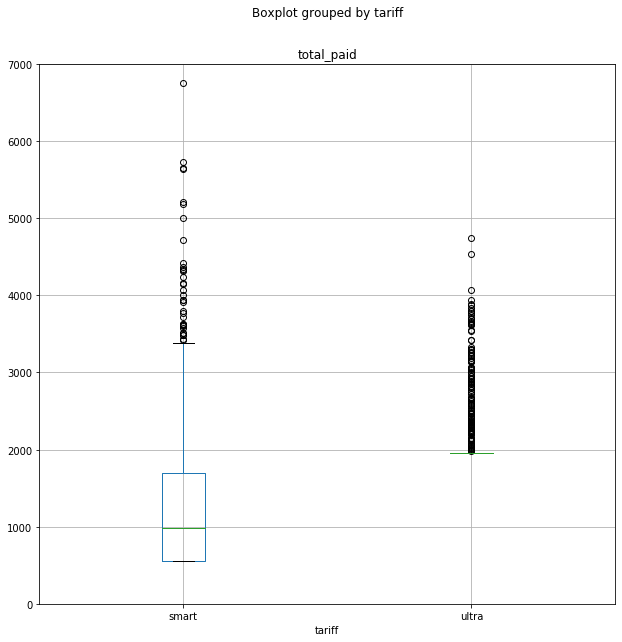

In [68]:
df.boxplot('total_paid', by='tariff', figsize=(10,10)).set_ylim(0,7000)

Эм, я даже не знаю как интерпретировать Ультру.
Попробуем что-нибудь другое

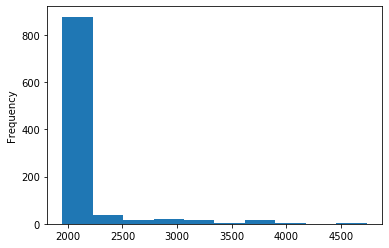

In [69]:
df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10)

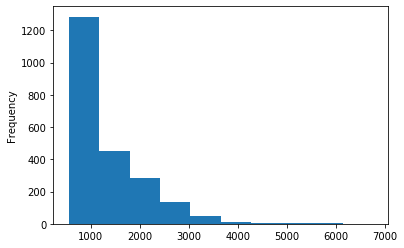

In [70]:
df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10)

In [71]:
df.groupby('tariff')\
  .agg({'total_paid':['median','mean','var','std']})\
  .style.format("{:.2f}")

Ага, Ультру, видимо, в основном платят по тарифу и мелкими группами вылазят на каждую тысячу рублей.
А у Смарта люди вылезают за абонентскую плату чаще, для них это как будто дело привычное

In [72]:
df.groupby('tariff')\
  .agg({'month_calls_duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — Звонки в минутах в месяц')

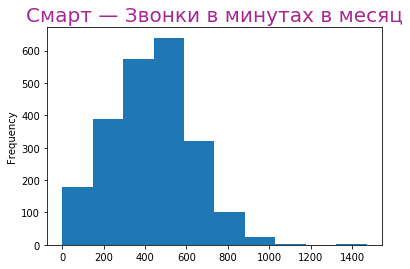

In [73]:
df[df['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Смарт — Звонки в минутах в месяц', fontdict=font)

Text(0.5, 1.0, 'Ультра — Звонки в минутах в месяц')

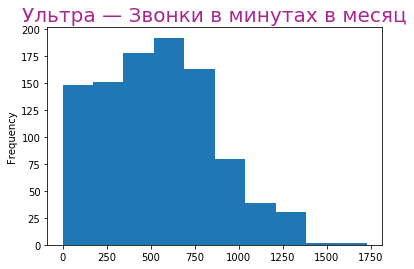

In [74]:
df[df['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Ультра — Звонки в минутах в месяц', fontdict=font)

На Смарте люди в месяц говорят около 450 минут, на Ультре 550 минут в месяц.
То есть на Смарте люди подходят к краю своего тарифа, а на Ультре у них остается запас 2500 минут.
Среднее и медиана лежат рядом и там и там — ничего экстремального, видимо

In [75]:
df.groupby('tariff')\
  .agg({'mb_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — Интернет в МБ в месяц')

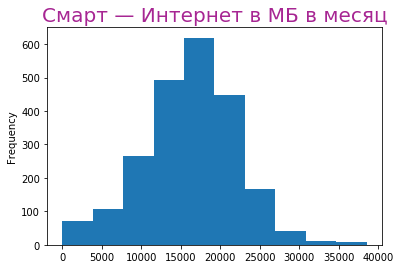

In [76]:
df[df['tariff'] == 'smart']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — Интернет в МБ в месяц', fontdict=font)

Text(0.5, 1.0, 'Ультра — Интернет в МБ в месяц')

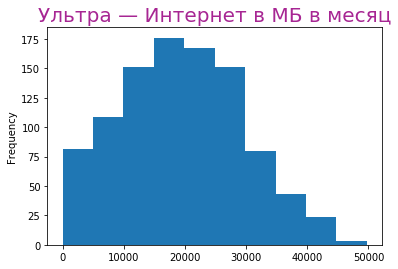

In [77]:
df[df['tariff'] == 'ultra']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — Интернет в МБ в месяц', fontdict=font)

Среднее и медиана лежат рядом и там и там и тут тоже.
На Смарте люди выходят за пределы тарифа больше, у Ультры снова запас — в 10 Гб, но и разброс больше

In [78]:
df.groupby('tariff')\
  .agg({'sms_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — СМС в месяц')

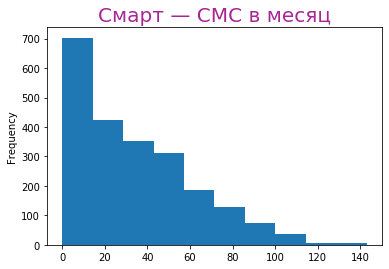

In [79]:
df[df['tariff'] == 'smart']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — СМС в месяц', fontdict=font)

Text(0.5, 1.0, 'Ультра — СМС в месяц')

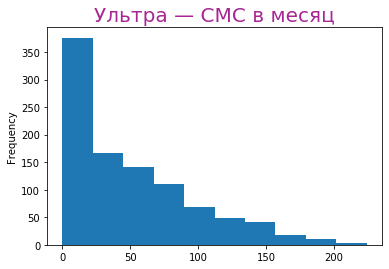

In [80]:
df[df['tariff'] == 'ultra']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — СМС в месяц', fontdict=font)

Поведение пользователей выглядит похожим. Смс-ки никому не нужны. Совсем. &#128560;

----------

## <span style="color:green">Комментарий от наставника<span>

### Что можно сделать лучше:
* К графикам лучше добавить подписи `plt.title()`, чтобы сразу было понятно о чём речь.
---------

**Понял, а это нормально, что появляется этот текст?**
- *Text(0.5, 1.0, 'Ультра — СМС в месяц')*

<a name="stage_4"></a>
# [4. Проверка гипотез](#stage_4)
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Пороговое значение alpha задайте самостоятельно.

**Поясните:**
    - как вы формулировали нулевую и альтернативную гипотезы
    - какой критерий использовали для проверки гипотез и почему

    
[Наверх к оглавлению](#contents)

In [81]:
# Напишем функцию для удаления выбросов

def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотеза о равенстве средних двух генеральных совокупностей №1

**Сформулируем гипотезы:**
- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [82]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"


In [83]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [84]:
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

In [85]:
smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

In [86]:
alpha = 0.05

In [87]:
results = st.ttest_ind(ultra, smart)
# equal_var = False

In [88]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3182106890742663e-188
Отвергаем нулевую гипотезу


Разница не случайна, есть значимые различия между выборками

-----

Гипотеза о равенстве средних двух генеральных совокупностей №2

**Сформулируем гипотезы:**
- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [89]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [90]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

In [91]:
moscow = df[df['region'] == 'Москва']
province = df[df['region'] == 'Провинция']

In [92]:
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

In [93]:
province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

In [94]:
results = st.ttest_ind(moscow, province)
# equal_var = False

In [95]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3093579795626914
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 30% такой результат может быть получен случайно. Значимых различий нет.


-----

----------

## <span style="color:green">Комментарий от наставника<span>
    
Отличный блок с проверкой гипотез, есть пара замечаний.

### Что нужно доработать:
* Перед проверкой гипотез нужно избавиться от выбросов. Например, методом 3х сигм. Выбросы влияют на распределение t-критерия.
* Добавь пояснение, почему использовал t-критерий для независимых выборок.

---------

**Влияют, но не влияют, спасибо!=)**

<a name="stage_5"></a>
# [5. Результаты исследования](#stage_5)
Люди на разных тарифах ведут себя по-разному, что наверно и хорошо. Так и должно работать сегментирование. Но и переплачивают, а это, особенно в Смарте, может приводить к разочарованию и оттоку.

- СМС-ки никому не нужны на обоих тарифах. Но если в Смарте люди близки к своим лимитам, то на Ультре остаются большие неизрасходованные "запасы" — возможно, имеет смысл подумать, как использовать эту, по сути, упущенную выгоду

- Деньги одинаково текут и из регионов и из Москвы, и вероятно это не связано с уровнем жизни, а с поведением: ~8-10 часов в месяц — это предел у среднего клиента на обоих тарифах

- Тарифы приносят разные деньги, значимые различия есть

## Рекомендации оператору
- Исправить округление — нулевые минуты должны округляться до 1
- Не публиковать незашифрованные ФИО и города в одном наборе
- Подумать над оптимизацией тарифов


[Наверх к оглавлению](#contents)

----------

## <span style="color:green">Комментарий от наставника<span>
    
Хороший, красивый проект, как обычно :) Исправь некоторые замечания и высылай скорее на проверку!

### Что нужно доработать:
* Добавь рекомендации бизнесу :)

---------